<a href="https://colab.research.google.com/github/FergusAlvin2331084/FergusAlvin-2331084-pertemuan10-AI/blob/main/Studi%20kasus%20pert%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem Understanding

In [ ]:
print("""
Masalah utama:
Bank Sentral ingin mengetahui faktor-faktor yang memengaruhi kesehatan bank
dan memprediksi apakah sebuah bank berisiko mengalami kebangkrutan (bankruptcy).

Tujuan analisis:
1. Mengidentifikasi indikator finansial yang paling berpengaruh terhadap kebangkrutan.
2. Mengembangkan model prediksi (machine learning) yang dapat memperkirakan potensi kebangkrutan.
3. Memberikan insight kepada Bank Sentral untuk pengambilan keputusan preventif.

Mengapa perlu predictive analytics:
Karena analisis prediktif membantu mendeteksi risiko lebih dini,
sehingga Bank Sentral dapat melakukan tindakan pengawasan dan mitigasi sebelum kebangkrutan terjadi.
""")



Masalah utama:
Bank Sentral ingin mengetahui faktor-faktor yang memengaruhi kesehatan bank
dan memprediksi apakah sebuah bank berisiko mengalami kebangkrutan (bankruptcy).

Tujuan analisis:
1. Mengidentifikasi indikator finansial yang paling berpengaruh terhadap kebangkrutan.
2. Mengembangkan model prediksi (machine learning) yang dapat memperkirakan potensi kebangkrutan.
3. Memberikan insight kepada Bank Sentral untuk pengambilan keputusan preventif.

Mengapa perlu predictive analytics:
Karena analisis prediktif membantu mendeteksi risiko lebih dini,
sehingga Bank Sentral dapat melakukan tindakan pengawasan dan mitigasi sebelum kebangkrutan terjadi.



2. Data Understanding (EDA)

Jumlah data dan fitur: (6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8 

None


Jumlah missing value setiap kolom:


,0
Bankrupt?,0
ROA(C) before interest and depreciation before interest,0
ROA(A) before interest and % after tax,0
ROA(B) before interest and depreciation after tax,0
Operating Gross Margin,0
...,...
Liability to Equity,0
Degree of Financial Leverage (DFL),0
Interest Coverage Ratio (Interest expense to EBIT),0
Net Income Flag,0


Kolom target terdeteksi: Bankrupt?

Distribusi kelas target:


,count
Bankrupt?,
0,6599
1,220


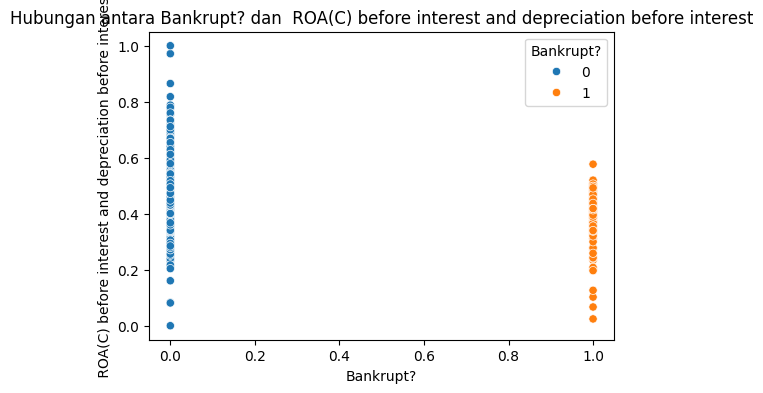

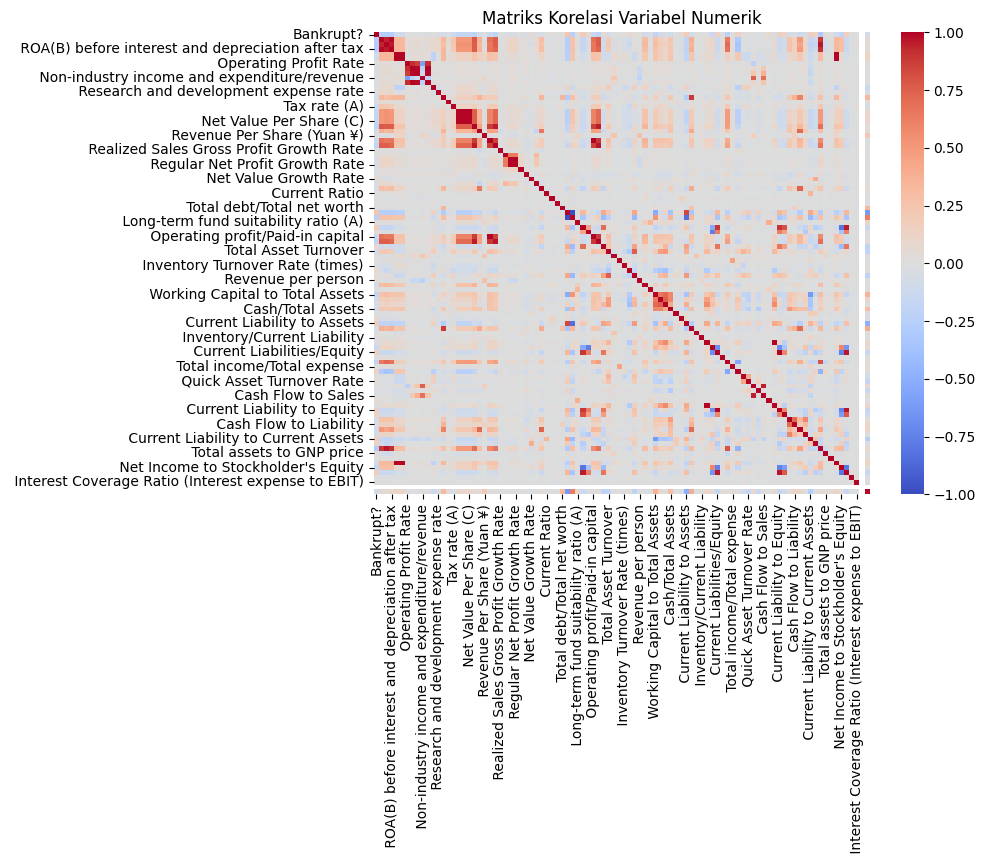

In [ ]:
import pandas as pd

df = pd.read_csv('/content/data-bank.csv')

print("Jumlah data dan fitur:", df.shape)
display(df.head())

print("\nInformasi dataset:")
display(df.info())

print("\nJumlah missing value setiap kolom:")
display(df.isna().sum())

for c in df.columns:
    if 'bankrupt' in c.lower() or 'bankruptcy' in c.lower():
        target = c
        break
else:
    target = df.columns[-1]

print("Kolom target terdeteksi:", target)
print("\nDistribusi kelas target:")
display(df[target].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include='number').columns
if len(num_cols) >= 2:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[num_cols[0]], y=df[num_cols[1]], hue=df[target])
    plt.title(f"Hubungan antara {num_cols[0]} dan {num_cols[1]}")
    plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()



3. Data Preparation (balance check + cleaning + transformasi)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
from collections import Counter

X = df.drop(columns=[target])
y = df[target]

if not np.issubdtype(y.dtype, np.number):
    y = LabelEncoder().fit_transform(y)

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])
if len(cat_cols) > 0:
    X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])
    for c in cat_cols:
        X = pd.get_dummies(X, columns=[c], drop_first=True)

print("Jumlah fitur setelah encoding:", X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Distribusi sebelum oversampling:", Counter(y_train))

counts = Counter(y_train)
if counts[max(counts, key=counts.get)] / counts[min(counts, key=counts.get)] > 1.5:
    df_train = pd.concat([X_train, pd.Series(y_train, name='target')], axis=1)
    df_major = df_train[df_train['target']==0]
    df_minor = df_train[df_train['target']==1]
    df_minor_up = resample(df_minor, replace=True, n_samples=len(df_major), random_state=42)
    train_balanced = pd.concat([df_major, df_minor_up])
    X_train = train_balanced.drop(columns='target')
    y_train = train_balanced['target']
    print("Setelah oversampling:", Counter(y_train))
else:
    print("Dataset sudah seimbang, tidak perlu oversampling.")

from collections import Counter
print("Cek keseimbangan target (balance check):")
counts = Counter(y)
print(counts)
if counts[0] != counts[1]:
    print("Data tidak balance — perlu oversampling.")
else:
    print("Data sudah balance.")


Jumlah fitur setelah encoding: 95
Distribusi sebelum oversampling: Counter({0: 5279, 1: 176})
Setelah oversampling: Counter({0: 5279, 1: 5279})
Cek keseimbangan target (balance check):
Counter({0: 6599, 1: 220})
Data tidak balance — perlu oversampling.


4. Modeling (3 algoritma)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced'),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300, early_stopping=True, random_state=42)
}

trained_models = {}
for name, model in models.items():
    print(f"Melatih model {name}...")
    if name == "NeuralNetwork":
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)
    trained_models[name] = model
print("Pelatihan selesai untuk semua model.")


Melatih model DecisionTree...
Melatih model RandomForest...
Melatih model NeuralNetwork...
Pelatihan selesai untuk semua model.


5. Evaluation

In [1]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

for name, model in trained_models.items():
    if name == "NeuralNetwork":
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")


NameError: name 'trained_models' is not defined

6. Feature importance

In [ ]:
import pandas as pd

rf = trained_models["RandomForest"]
fi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 5 fitur yang paling berpengaruh terhadap kebangkrutan:")
display(fi.head(5))


Top 5 fitur yang paling berpengaruh terhadap kebangkrutan:


,Feature,Importance
35,Total debt/Total net worth,0.052653
39,Borrowing dependency,0.052290
18,Persistent EPS in the Last Four Seasons,0.048208
85,Net Income to Total Assets,0.045490
9,Continuous interest rate (after tax),0.034643
